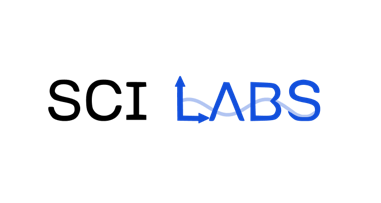

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_excel(r"/content/teplota_30-10.xlsx")
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df.iloc[0,0], format).timestamp()
time1 = np.array([datetime.strptime(x, format).timestamp() for x in df.iloc[:, 0] ])[0:-1] - t0
temperature1 = np.array(df.iloc[:, -1][0:-1] )

df = pd.read_excel(r"/content/teplota_50-10.xlsx")
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df.iloc[0,0], format).timestamp()
time2 = np.array([datetime.strptime(x, format).timestamp() for x in df.iloc[:, 0] ])[0:-1] - t0
temperature2 = np.array(df.iloc[:, -1][0:-1] )

df = pd.read_excel(r"/content/teplota_50-30.xlsx")
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df.iloc[0,0], format).timestamp()
time3 = np.array([datetime.strptime(x, format).timestamp() for x in df.iloc[:, 0] ])[0:-1] - t0
temperature3 = np.array(df.iloc[:, -1][0:-1] )




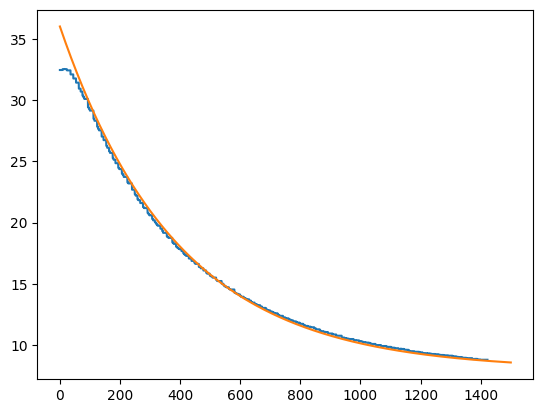

In [ ]:
plt.plot(time1,temperature1)

x = np.linspace(0,1500,400)
plt.plot(x,np.exp(-x/390)*28 + 8)


50.9500007629395

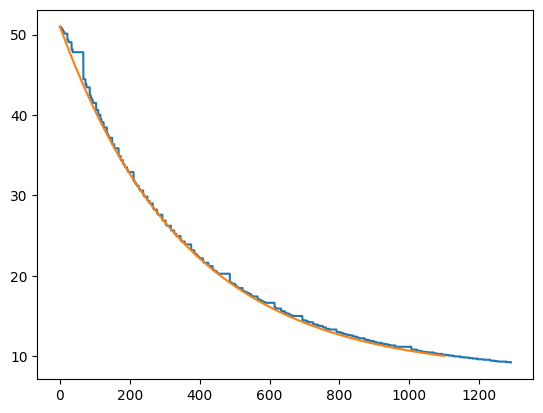

In [ ]:
plt.plot(time2,temperature2)
plt.plot(x,np.exp(-x/360)*(51-8) + 8)
temperature2[0]

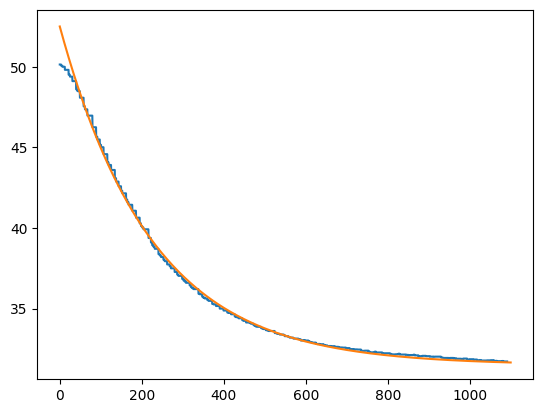

In [ ]:
plt.plot(time3,temperature3)
x = np.linspace(0,1100,400)
plt.plot(x,np.exp(-x/225)*21 + 31.5)

Text(0.5, 0, 'Čas [s]')

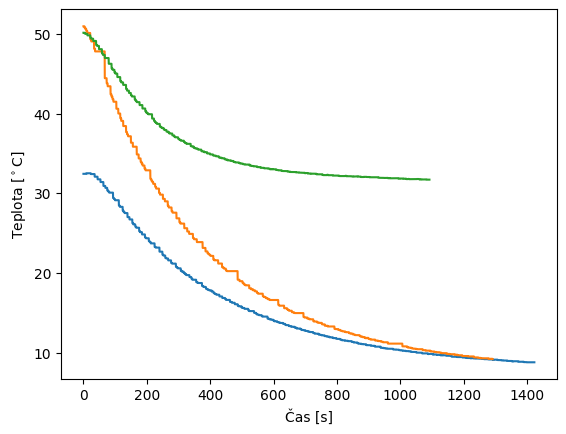

In [ ]:
plt.plot(time1,temperature1)
plt.plot(time2,temperature2)
plt.plot(time3,temperature3)
plt.ylabel('Teplota [$^\circ$C]')
plt.xlabel('Čas [s]')

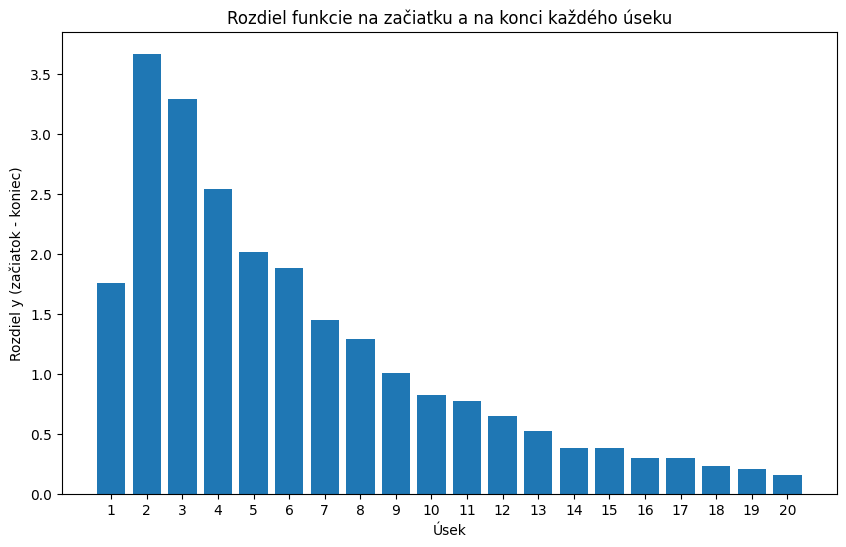

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generujeme hodnoty x a y pre danú funkciu
x = time1  # 100 bodov medzi 0 a 5
y = temperature1

# Počet úsekov, na ktoré chceme rozdeliť funkciu
n = 20

# Rozdelíme x a y na n úsekov
x_sections = np.array_split(x, n)
y_sections = np.array_split(y, n)

# Vypočítame rozdiely na každom úseku
differences = []
for i in range(n):
    diff = y_sections[i][0] - y_sections[i][-1]  # Rozdiel y na začiatku a na konci úseku
    differences.append(diff)

# Vykreslenie rozdielov pre jednotlivé úseky
plt.figure(figsize=(10, 6))
plt.bar(range(1, n+1), differences, tick_label=[f"{i+1}" for i in range(n)])
plt.xlabel("Úsek")
plt.ylabel("Rozdiel y (začiatok - koniec)")
plt.title("Rozdiel funkcie na začiatku a na konci každého úseku")
plt.show()


In [2]:
df = pd.read_excel(r"/content/25-10-new.xlsx")
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df.iloc[0,0], format).timestamp()
time1 = np.array([datetime.strptime(x, format).timestamp() for x in df.iloc[:, 0] ])[0:-1] - t0
temperature1 = np.array(df.iloc[:, -1][0:-1] )

df = pd.read_excel(r"/content/50-10-new.xlsx")
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df.iloc[0,0], format).timestamp()
time2 = np.array([datetime.strptime(x, format).timestamp() for x in df.iloc[:, 0] ])[0:-1] - t0
temperature2 = np.array(df.iloc[:, -1][0:-1] )

df = pd.read_excel(r"/content/50-25-new.xlsx")
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df.iloc[0,0], format).timestamp()
time3 = np.array([datetime.strptime(x, format).timestamp() for x in df.iloc[:, 0] ])[0:-1] - t0
temperature3 = np.array(df.iloc[:, -1][0:-1] )




Text(0.5, 0, 'Čas [s]')

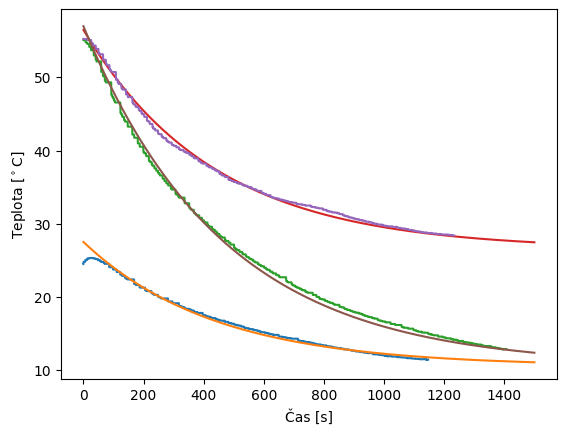

In [45]:
plt.plot(time1,temperature1)
x = np.linspace(0,1500,400)
plt.plot(x,np.exp(-x/435)*17 + 10.5)
plt.plot(time2,temperature2)
x = np.linspace(0,1500,400)
plt.plot(x,np.exp(-x/435)*30 + 26.5)
plt.plot(time3,temperature3)
x = np.linspace(0,1500,400)
plt.plot(x,np.exp(-x/465)*46.5 + 10.5)
plt.ylabel('Teplota [$^\circ$C]')
plt.xlabel('Čas [s]')

Fitované parametre: a = 17.31486915235281, b = 585.5287246458032, c = 8.896098519080242
Fitované parametre: a = 44.93957790096869, b = 484.7853375250424, c = 10.766469163183316
Fitované parametre: a = 29.06583719305717, b = 406.1914249920426, c = 27.380269974828014


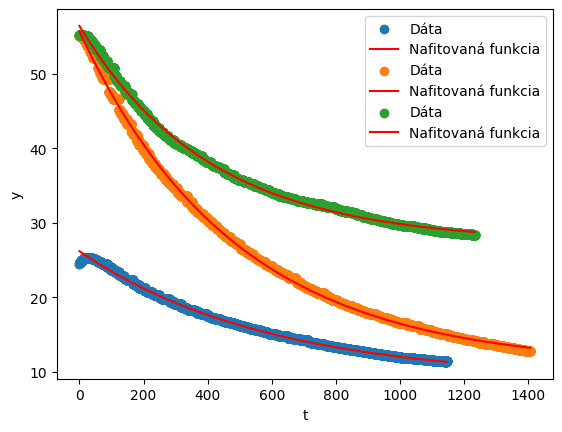

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definujme funkciu, ktorú chceme fitovať
def model_function(t, a, b, c):
    return a * np.exp(-t / b) + c

# Simulované alebo skutočné experimentálne dáta (t a y)
t_data = time1
y_data = temperature1

# Použitie curve_fit na fitovanie funkcie na dáta
# Počiatočné odhady pre parametre a, b, c (môžeš upraviť podľa svojich dát)
initial_guess = [17, 435, 10]
params, covariance = curve_fit(model_function, t_data, y_data, p0=initial_guess)

# Výsledné parametre
a_fit, b_fit, c_fit = params
print(f"Fitované parametre: a = {a_fit}, b = {b_fit}, c = {c_fit}")

# Vizualizácia dát a nafitovanej krivky
t_fit = np.linspace(min(t_data), max(t_data), 100)
y_fit = model_function(t_fit, *params)

plt.scatter(t_data, y_data, label='Dáta')
plt.plot(t_fit, y_fit, label='Nafitovaná funkcia', color='red')

t_data = time2
y_data = temperature2

# Použitie curve_fit na fitovanie funkcie na dáta
# Počiatočné odhady pre parametre a, b, c (môžeš upraviť podľa svojich dát)
initial_guess = [17, 435, 10]
params, covariance = curve_fit(model_function, t_data, y_data, p0=initial_guess)

# Výsledné parametre
a_fit, b_fit, c_fit = params
print(f"Fitované parametre: a = {a_fit}, b = {b_fit}, c = {c_fit}")

# Vizualizácia dát a nafitovanej krivky
t_fit = np.linspace(min(t_data), max(t_data), 100)
y_fit = model_function(t_fit, *params)

plt.scatter(t_data, y_data, label='Dáta')
plt.plot(t_fit, y_fit, label='Nafitovaná funkcia', color='red')

t_data = time3
y_data = temperature3

# Použitie curve_fit na fitovanie funkcie na dáta
# Počiatočné odhady pre parametre a, b, c (môžeš upraviť podľa svojich dát)
initial_guess = [17, 435, 10]
params, covariance = curve_fit(model_function, t_data, y_data, p0=initial_guess)

# Výsledné parametre
a_fit, b_fit, c_fit = params
print(f"Fitované parametre: a = {a_fit}, b = {b_fit}, c = {c_fit}")

# Vizualizácia dát a nafitovanej krivky
t_fit = np.linspace(min(t_data), max(t_data), 100)
y_fit = model_function(t_fit, *params)

plt.scatter(t_data, y_data, label='Dáta')
plt.plot(t_fit, y_fit, label='Nafitovaná funkcia', color='red')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()
